In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[2]], [x[2], 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    #H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[1]], [z[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[2]], [x[2], 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.0000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(x[0])
x.append(x[0])

i = 0

psi0 = [[complex(1.0,0.0)],[complex(0.0,0.0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(x[0])
    x.append(x[0])
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.9996878645671962-0.01570237338600771j)], [(-0.0006103789221535824-0.019422570933750865j)]]
iteracao:  2
[[(0.997545281820963-0.03131094065816756j)], [(-0.0035595674723561625-0.06253290432764817j)]]
iteracao:  3
[[(0.995873772557032-0.046885831948538834j)], [(-0.007447107749395431-0.0773413690692163j)]]
iteracao:  4
[[(0.9953026730559217-0.06255987370696774j)], [(-0.010782402086229045-0.07309302223201036j)]]
iteracao:  5
[[(0.9921343917484012-0.07784146747615224j)], [(-0.01649113438532763-0.09663382363221183j)]]
iteracao:  6
[[(0.9919556805603749-0.09366084668957912j)], [(-0.019605168770844165-0.08286862890352324j)]]
iteracao:  7
[[(0.9900074453111425-0.10913578624232159j)], [(-0.024011885248726134-0.08601201340786291j)]]
iteracao:  8
[[(0.9864129051031112-0.12415198225116529j)], [(-0.030642878333289155-0.10313524411492095j)]]
iteracao:  9
[[(0.9843344217599432-0.1396283456820058j)], [(-0.035477362976395796-0.10164165758662069j)]]
iteracao:  10
[[(0.9762807222768632-0.

[[(0.34295717943679455-0.9043359898008586j)], [(-0.08372644959285168+0.23988881628198008j)]]
iteracao:  80
[[(0.3168001409249051-0.9122023970751911j)], [(-0.02867479745805994+0.2582676575579384j)]]
iteracao:  81
[[(0.3095846259395316-0.9161272952999475j)], [(-0.04232657924710264+0.25115048930484707j)]]
iteracao:  82
[[(0.29608312939804804-0.9207441293251323j)], [(-0.0338535188080331+0.25183116856437143j)]]
iteracao:  83
[[(0.2746676845555572-0.9256428024430797j)], [(0.003128291465986262+0.2602561202454064j)]]
iteracao:  84
[[(0.2725451832480716-0.9292750603403909j)], [(-0.030425355694599386+0.24746969795116103j)]]
iteracao:  85
[[(0.253398480246551-0.9336973322927863j)], [(-0.0018319373059549095+0.25297255598816504j)]]
iteracao:  86
[[(0.24069540276924362-0.9375813112070255j)], [(0.0026388540585917117+0.25099803307762547j)]]
iteracao:  87
[[(0.21341522237380836-0.9396026447261803j)], [(0.060645294645850174+0.2606202729641097j)]]
iteracao:  88
[[(0.2092230795692547-0.9448829654192018j)]

[[(-0.33001564725415056-0.505283447660091j)], [(-0.20365617196350339-0.7709101158532577j)]]
iteracao:  158
[[(-0.3201927860284877-0.5051596753365121j)], [(-0.22827193959635986-0.7682331265164962j)]]
iteracao:  159
[[(-0.34392687966328006-0.49468197139182j)], [(-0.2745024153112895-0.7494347236589585j)]]
iteracao:  160
[[(-0.33716073610781044-0.4949307721054154j)], [(-0.30002089725919223-0.7425318594984257j)]]
iteracao:  161
[[(-0.3156444019415102-0.5019739777310953j)], [(-0.31526732364950777-0.7409434417615477j)]]
iteracao:  162
[[(-0.32056768474247255-0.4983023891404741j)], [(-0.3478525132945048-0.7265876749791854j)]]
iteracao:  163
[[(-0.3368142793657691-0.48877750670191655j)], [(-0.38745392173693416-0.7053595398277287j)]]
iteracao:  164
[[(-0.3621574166483997-0.47273589843016195j)], [(-0.4324092662504225-0.6770413084576872j)]]
iteracao:  165
[[(-0.3762106053360273-0.46238964106815916j)], [(-0.4684521639061977-0.6520842746145713j)]]
iteracao:  166
[[(-0.3673265759373782-0.468538630702

[[(-0.7051433243593039-0.01125498198261208j)], [(0.41063873958093616+0.5779463103244836j)]]
iteracao:  235
[[(-0.7125862351934599+0.0054479813093374595j)], [(0.43722760512676223+0.5486557140961168j)]]
iteracao:  236
[[(-0.7204999823034383+0.023578972968172608j)], [(0.46210881426110706+0.516506675148297j)]]
iteracao:  237
[[(-0.7227344818460494+0.03746940192006062j)], [(0.48567063140037514+0.4902803733802779j)]]
iteracao:  238
[[(-0.7407565606104002+0.06912497431026554j)], [(0.5053662808754577+0.43715703136207057j)]]
iteracao:  239
[[(-0.7394488855748752+0.08059095250758377j)], [(0.5254267728008982+0.4130944715545822j)]]
iteracao:  240
[[(-0.7383032938652352+0.09248303377542809j)], [(0.5442474197524937+0.38749164218491655j)]]
iteracao:  241
[[(-0.7347917021272327+0.10112602527238573j)], [(0.5625002053849437+0.36530547808918273j)]]
iteracao:  242
[[(-0.7410656764843457+0.12608642417760946j)], [(0.5760115741928078+0.32114550372376194j)]]
iteracao:  243
[[(-0.7415667629315142+0.14273453521

[[(-0.2566685292567211+0.7556226192412162j)], [(-0.568223263483942-0.20069355251627635j)]]
iteracao:  315
[[(-0.24518175535740172+0.760860889033183j)], [(-0.5753144442475849-0.1731755189647555j)]]
iteracao:  316
[[(-0.23674673949505837+0.7779180050118508j)], [(-0.5648003403691698-0.14069466876950645j)]]
iteracao:  317
[[(-0.22762689941525704+0.7960985714197996j)], [(-0.5501548247584365-0.10836320032919154j)]]
iteracao:  318
[[(-0.21433792840634194+0.7949941691472547j)], [(-0.5612387041435016-0.08399104429681196j)]]
iteracao:  319
[[(-0.20145663812125508+0.7951514298619833j)], [(-0.5689701882183892-0.05849962814054749j)]]
iteracao:  320
[[(-0.18820035590480938+0.7880628629273682j)], [(-0.585090915879532-0.03472787306329932j)]]
iteracao:  321
[[(-0.17512218200606183+0.7698653962049712j)], [(-0.6135748683303842-0.012854118648834307j)]]
iteracao:  322
[[(-0.16314085992272676+0.7478560904557124j)], [(-0.6434231693481554+0.01013935146134682j)]]
iteracao:  323
[[(-0.15231816131015613+0.728155

[[(0.5747703520360966+0.3237899594536238j)], [(0.7063543303412053-0.25663687302295496j)]]
iteracao:  394
[[(0.5803968255767717+0.31625610927435194j)], [(0.6928072198456059-0.28833933874115203j)]]
iteracao:  395
[[(0.5891131300418767+0.3156014418386003j)], [(0.6746870735314481-0.31327084538474714j)]]
iteracao:  396
[[(0.5995618352355233+0.3174957453344776j)], [(0.654068423244-0.33453904833375975j)]]
iteracao:  397
[[(0.6154561804841684+0.32834565253341086j)], [(0.6277643662180994-0.34541937158986996j)]]
iteracao:  398
[[(0.6347419328030219+0.34323870346420904j)], [(0.5978470573170981-0.3490968147030729j)]]
iteracao:  399
[[(0.6328833719684787+0.3219144083473895j)], [(0.5868293295812255-0.38917978829722527j)]]
iteracao:  400
[[(0.6503760819636125+0.32987148202815164j)], [(0.5580529437889554-0.3959450560837735j)]]
iteracao:  401
[[(0.645927994775248+0.30715780525776976j)], [(0.5456612086727717-0.43667467449380154j)]]
iteracao:  402
[[(0.6467398518866315+0.29238172276145136j)], [(0.5269363

[[(0.6184503493691808-0.31881862718983656j)], [(-0.4728420201057591+0.5406422633395916j)]]
iteracao:  478
[[(0.6195470582770242-0.32336905045887676j)], [(-0.4506078514223993+0.5554693947729372j)]]
iteracao:  479
[[(0.6044202476257584-0.3405216508835568j)], [(-0.41793081019182315+0.586561839552885j)]]
iteracao:  480
[[(0.6116818103864979-0.3413510253538373j)], [(-0.39743153991410257+0.5927670668351349j)]]
iteracao:  481
[[(0.5851543124598898-0.3636847304155741j)], [(-0.35649321452589533+0.6310627688297754j)]]
iteracao:  482
[[(0.6039312349203143-0.35944023722156093j)], [(-0.3409886336242749+0.6243366989073587j)]]
iteracao:  483
[[(0.5971957423037576-0.36939488405958126j)], [(-0.3105949435065602+0.640652189958217j)]]
iteracao:  484
[[(0.6040517584271129-0.37291745885384314j)], [(-0.28768203169834605+0.6428785834093307j)]]
iteracao:  485
[[(0.5781120560249347-0.39027839219109484j)], [(-0.2450941294072567+0.6733482578806388j)]]
iteracao:  486
[[(0.569307233882217-0.4001624904608353j)], [(-

[[(0.06763845920137501-0.6934748430003034j)], [(0.3173248354386035-0.6432902758665083j)]]
iteracao:  556
[[(0.052982644807641144-0.6961475789534443j)], [(0.2826672721976264-0.6577768238742888j)]]
iteracao:  557
[[(0.0703406062331738-0.6851295094509212j)], [(0.28078869275354296-0.6684363944122703j)]]
iteracao:  558
[[(0.08254231463221995-0.6769301072236091j)], [(0.2721859320975524-0.6788718313807856j)]]
iteracao:  559
[[(0.050258411699157596-0.6856926843614033j)], [(0.21842174883114068-0.6925253222839347j)]]
iteracao:  560
[[(0.06466360699321376-0.6788643428371436j)], [(0.21019758064444818-0.7005558840180581j)]]
iteracao:  561
[[(0.023355435891473576-0.6872997707001725j)], [(0.1473338826321019-0.7108910046609014j)]]
iteracao:  562
[[(0.023152451884018897-0.6856553241844398j)], [(0.12385853145792908-0.7169376187561235j)]]
iteracao:  563
[[(-0.016921026092560326-0.689485216693636j)], [(0.06197151203857154-0.7214451391073473j)]]
iteracao:  564
[[(0.0025160230730909457-0.6868893486104837j)]

[[(-0.32623948076535075-0.15056467048785152j)], [(0.08622654013355877+0.9292269686670775j)]]
iteracao:  633
[[(-0.32141222707891504-0.14630732023743606j)], [(0.1288182132339752+0.9266573856904884j)]]
iteracao:  634
[[(-0.3448270721250665-0.13756767435093534j)], [(0.17541966904302644+0.9118097711062491j)]]
iteracao:  635
[[(-0.3529940927474139-0.1307677504467004j)], [(0.2190192939225976+0.9001806531598826j)]]
iteracao:  636
[[(-0.3738259730255412-0.11994700487830745j)], [(0.2636562124385392+0.8811083659860065j)]]
iteracao:  637
[[(-0.36362743565039557-0.11805582514184279j)], [(0.3033537447684878+0.8728196311984329j)]]
iteracao:  638
[[(-0.32724423825349264-0.12672431246405447j)], [(0.3391361853867505+0.8728336018340547j)]]
iteracao:  639
[[(-0.32243263736504557-0.12443545537357197j)], [(0.37895258055013264+0.8584565480731565j)]]
iteracao:  640
[[(-0.2851700651693713-0.13785488307894952j)], [(0.41329500129651975+0.8537335632389365j)]]
iteracao:  641
[[(-0.3142378545925161-0.1191106645717

[[(-0.16153045093262447+0.12194005916471823j)], [(-0.4784344710978951-0.8544814868966776j)]]
iteracao:  710
[[(-0.18025187326499595+0.13688671447300466j)], [(-0.5148669389335108-0.8268512220882358j)]]
iteracao:  711
[[(-0.2100344416728091+0.16100170662779736j)], [(-0.5471743896571338-0.7940804671379993j)]]
iteracao:  712
[[(-0.22939534234041065+0.18041455055566355j)], [(-0.5789962639130477-0.7613089450375339j)]]
iteracao:  713
[[(-0.2404406450233018+0.19527847681394048j)], [(-0.6105877320244635-0.7288599662838523j)]]
iteracao:  714
[[(-0.2255759129780304+0.18852764621183804j)], [(-0.6475109281075686-0.7030661761467485j)]]
iteracao:  715
[[(-0.2526038004379998+0.2215096437455582j)], [(-0.6705875642963032-0.6613899985647205j)]]
iteracao:  716
[[(-0.25142072442356045+0.22796328778607514j)], [(-0.7001596849327405-0.628169076016826j)]]
iteracao:  717
[[(-0.23771067571867086+0.21989907236622944j)], [(-0.732789686096781-0.5984621308202691j)]]
iteracao:  718
[[(-0.2403500878904044+0.2316073047

[[(0.5380131026514632+0.12181815738013199j)], [(0.786511958757163+0.2776701292081002j)]]
iteracao:  788
[[(0.5317363990302469+0.13801733236251573j)], [(0.7950730754569023+0.2570329675356365j)]]
iteracao:  789
[[(0.5446622206028561+0.08976376746302236j)], [(0.81131406291904+0.19249556350402203j)]]
iteracao:  790
[[(0.5450171976781032+0.08598483335524082j)], [(0.8190415240021544+0.15726844469729723j)]]
iteracao:  791
[[(0.5471296191045095+0.07214817301489583j)], [(0.8259636836637385+0.11501014396582764j)]]
iteracao:  792
[[(0.5494217125857864+0.05158382698537192j)], [(0.831170203309859+0.06804779419332005j)]]
iteracao:  793
[[(0.5512870622273645+0.014011689949216213j)], [(0.8341415521706236+0.009676547533864474j)]]
iteracao:  794
[[(0.5516591463934174+0.02199124617395496j)], [(0.8335714410310912-0.01862098097920435j)]]
iteracao:  795
[[(0.552682934662811+0.029019271454542805j)], [(0.8315332370676994-0.04744942671553626j)]]
iteracao:  796
[[(0.5501764983444458-0.008541668054317976j)], [(0

[[(0.46965346783811185-0.5956697437287345j)], [(-0.6269348044269609+0.1776384038965659j)]]
iteracao:  871
[[(0.4614795999162343-0.5990266739730483j)], [(-0.6217236900734373+0.20411455329930486j)]]
iteracao:  872
[[(0.4609765532774548-0.579933885990031j)], [(-0.6365388669753013+0.21446456753571794j)]]
iteracao:  873
[[(0.4433297509984787-0.6087854939986805j)], [(-0.6045370385021459+0.25956385835037044j)]]
iteracao:  874
[[(0.443324167435572-0.5941296094445586j)], [(-0.6133520752314954+0.2725296217398016j)]]
iteracao:  875
[[(0.42890480783075136-0.6112332956807308j)], [(-0.5893884516535811+0.3083103144677794j)]]
iteracao:  876
[[(0.40693598743183584-0.6388184834949264j)], [(-0.5508149771869434+0.3505943231555158j)]]
iteracao:  877
[[(0.3935196521496131-0.6499706631977733j)], [(-0.5277930595683081+0.37962399520431345j)]]
iteracao:  878
[[(0.37047620785085844-0.6721365059945986j)], [(-0.48800946967471953+0.4157236152259497j)]]
iteracao:  879
[[(0.34753005489086986-0.6910430691856109j)], [(

[[(-0.5123754532270246-0.6040768338735489j)], [(0.32349575227998595-0.5176026543511444j)]]
iteracao:  949
[[(-0.5143003919362075-0.5915599231461033j)], [(0.3070211217681448-0.5397123592313422j)]]
iteracao:  950
[[(-0.4959786531034989-0.5685038282245659j)], [(0.3091003946172649-0.5790206847257918j)]]
iteracao:  951
[[(-0.5187912290196797-0.5674463379693412j)], [(0.2681658650255391-0.5804712025492762j)]]
iteracao:  952
[[(-0.5355183992801246-0.5625412447282956j)], [(0.23308355938836942-0.5851827749833034j)]]
iteracao:  953
[[(-0.5550654844310636-0.5579065548559242j)], [(0.19521198287640368-0.5852642986935723j)]]
iteracao:  954
[[(-0.5646782673248317-0.5493931685241602j)], [(0.16658573700154167-0.5929200844105579j)]]
iteracao:  955
[[(-0.5648511365809842-0.5383433267738229j)], [(0.14586086812171067-0.6081559804672676j)]]
iteracao:  956
[[(-0.5566281897219156-0.5258241226471093j)], [(0.13094161069915336-0.6297045166188706j)]]
iteracao:  957
[[(-0.5653398073285992-0.5171073457924826j)], [(0

In [6]:
len(Resp[0])

1000

/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


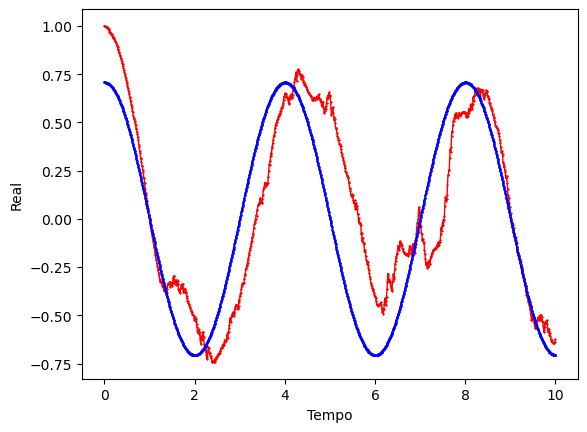

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_2.png', format='png')
plt.show()

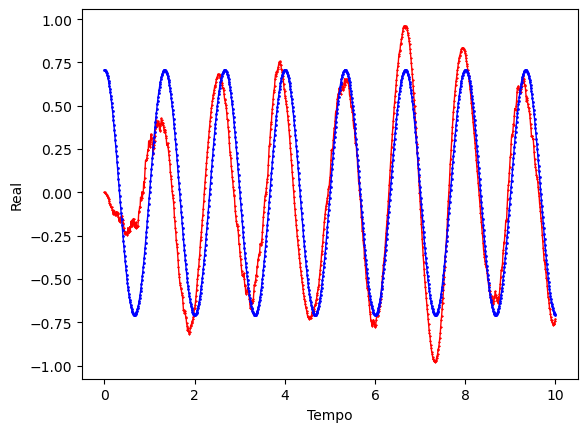

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_3.png', format='png')
plt.show()